0    8607
5     768
6     735
1     118
3      92
4      69
2      60
Name: label, dtype: int64
(10449, 143)
Epoch 1/8
700/700 [==============================] - 0s 519us/step - loss: 1.3985 - accuracy: 0.6887
Epoch 2/8
700/700 [==============================] - 0s 502us/step - loss: 0.5801 - accuracy: 0.8940
Epoch 3/8
700/700 [==============================] - 0s 539us/step - loss: 0.3889 - accuracy: 0.8940
Epoch 4/8
700/700 [==============================] - 0s 499us/step - loss: 0.3163 - accuracy: 0.8936
Epoch 5/8
700/700 [==============================] - 0s 511us/step - loss: 0.2855 - accuracy: 0.8943
Epoch 6/8
700/700 [==============================] - 0s 517us/step - loss: 0.2665 - accuracy: 0.8961
Epoch 7/8
700/700 [==============================] - 0s 490us/step - loss: 0.2528 - accuracy: 0.8967
Epoch 8/8
700/700 [==============================] - 0s 507us/step - loss: 0.2434 - accuracy: 0.8956


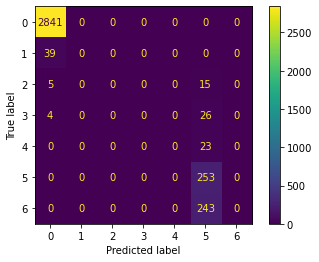

In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from tensorflow.keras.layers import Dropout
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
import seaborn as sns 
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split



d=pd.read_csv("labeled_packets.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

packets_dum=pd.get_dummies(d, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive','Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])


packets_dum.drop(columns=["iface_ver_3",
"retcode_10",
"ip_src_10.1.0.9",
"mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum["Label"].drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)


from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
dummy_y=np_utils.to_categorical(encoded_y)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42,stratify=y)
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(143,)))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
#model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(7,activation="softmax"))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, epochs=8,batch_size=10)

l=[]
for i in y_test:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 



# Cross Validation

TRAIN: [    0     2     3 ... 10443 10446 10447] TEST: [    1     9    18 ... 10444 10445 10448]
Epoch 1/8
4180/4180 [==============================] - 2s 583us/step - loss: 0.2797 - accuracy: 0.9202
Epoch 2/8
4180/4180 [==============================] - 2s 545us/step - loss: 0.0444 - accuracy: 0.9872
Epoch 3/8
4180/4180 [==============================] - 2s 541us/step - loss: 0.0107 - accuracy: 0.9964
Epoch 4/8
4180/4180 [==============================] - 2s 561us/step - loss: 0.0026 - accuracy: 0.9996
Epoch 5/8
4180/4180 [==============================] - 2s 542us/step - loss: 0.0016 - accuracy: 0.9998
Epoch 6/8
4180/4180 [==============================] - 2s 546us/step - loss: 7.7052e-05 - accuracy: 1.0000
Epoch 7/8
4180/4180 [==============================] - 2s 551us/step - loss: 2.5189e-05 - accuracy: 1.0000
Epoch 8/8
4180/4180 [==============================] - 2s 554us/step - loss: 0.0024 - accuracy: 0.9998
TRAIN: [    0     1     3 ... 10446 10447 10448] TEST: [    2     4    

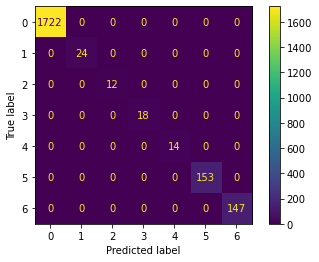

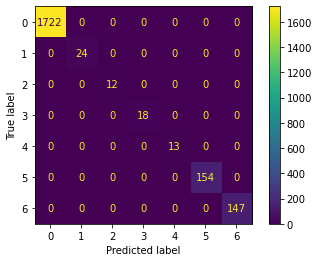

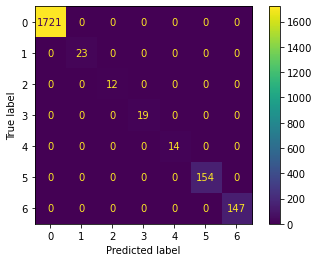

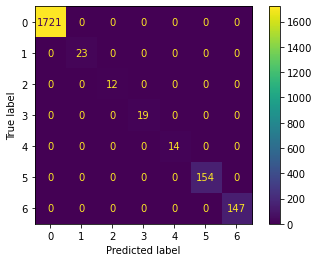

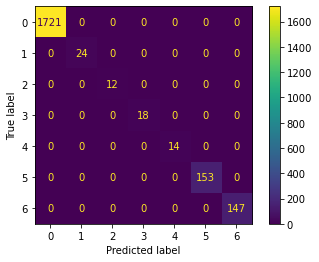

In [64]:
import random as rn


tf.random.set_seed(89)
rn.seed(1254)
np.random.seed(37)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=7,shuffle=True)
k=1
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = dummy_y[train_index], dummy_y[test_index]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(143,)))
    model.add(tf.keras.layers.Dense(15, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dense(7,activation="softmax"))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    history=model.fit(X_train, y_train, epochs=8,batch_size=2)
    
    l=[]
    for i in y_test:
        l.append(np.argmax(i))
    k=np.array(l)

    # Multiclass
    y_pred = model.predict_classes(X_test)
    cm=confusion_matrix(k, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
    disp.plot() 
    
    
    

# Plot ROC curves for the multilabel problem

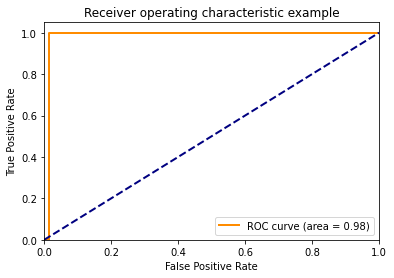

In [81]:
y_score=model.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[4], tpr[4], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<ipython-input-82-81281a3972c7>:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


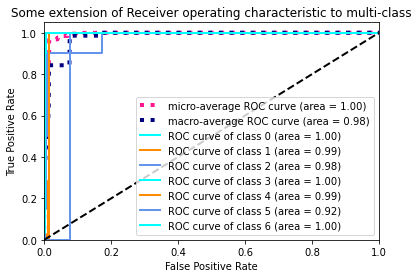

In [82]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()